In [2]:
#Loading essential libraries

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Creating dataframe named attendance.

attendance = read_csv("/Users/sharadraina/Desktop/archive/Project_03/attendance.csv" , show_col_types = FALSE)

head(attendance)

team,team_name,year,total,home,away,week,weekly_attendance
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arizona,Cardinals,2000,893926,387475,506451,1,77434
Arizona,Cardinals,2000,893926,387475,506451,2,66009
Arizona,Cardinals,2000,893926,387475,506451,3,NA
Arizona,Cardinals,2000,893926,387475,506451,4,71801
Arizona,Cardinals,2000,893926,387475,506451,5,66985
Arizona,Cardinals,2000,893926,387475,506451,6,44296


In [4]:
#Creating dataframe named standings

standings = read_csv("/Users/sharadraina/Desktop/archive/Project_03/standings.csv" ,show_col_types = FALSE)

head(standings ,5)

team,team_name,year,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Miami,Dolphins,2000,11,5,323,226,97,6.1,1.0,7.1,0.0,7.1,Playoffs,No Superbowl
Indianapolis,Colts,2000,10,6,429,326,103,6.4,1.5,7.9,7.1,0.8,Playoffs,No Superbowl
New York,Jets,2000,9,7,321,321,0,0.0,3.5,3.5,1.4,2.2,No Playoffs,No Superbowl
Buffalo,Bills,2000,8,8,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,No Playoffs,No Superbowl
New England,Patriots,2000,5,11,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,No Playoffs,No Superbowl


In [6]:
# Joining the dataframes.

attendance_joined = attendance %>%
  
                    left_join(standings , by = c("team" , "team_name" , "year"))

head(attendance_joined)

team,team_name,year,total,home,away,week,weekly_attendance,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Arizona,Cardinals,2000,893926,387475,506451,1,77434,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
Arizona,Cardinals,2000,893926,387475,506451,2,66009,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
Arizona,Cardinals,2000,893926,387475,506451,3,NA,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
Arizona,Cardinals,2000,893926,387475,506451,4,71801,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
Arizona,Cardinals,2000,893926,387475,506451,5,66985,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
Arizona,Cardinals,2000,893926,387475,506451,6,44296,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl


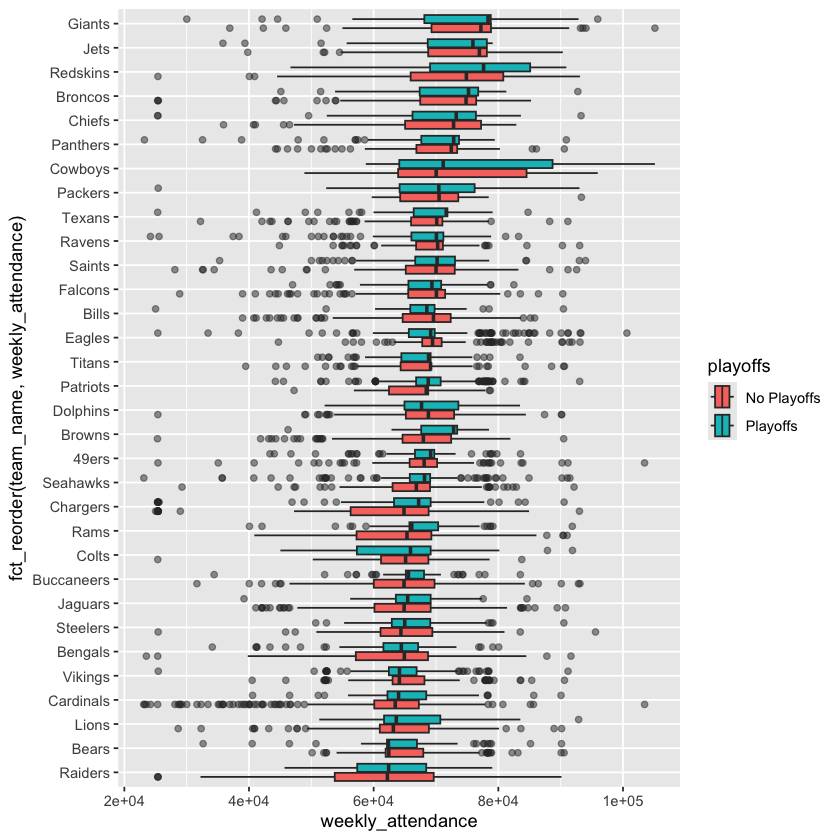

In [7]:
# Checking for basic visualizations.

attendance_joined %>%
  
  filter(!is.na(weekly_attendance)) %>%
  
  ggplot(aes( weekly_attendance  ,fct_reorder(team_name , weekly_attendance)  , fill = playoffs)) +

  geom_boxplot(outlier.alpha = 0.5) 

In [ ]:
##### This visualization reveals that there is some relationship between a teams weekly attendance with there qualifying for playoffs.
##### The teams when they qualified for playoffs had higher weekly attendance as compared to when they didnt qualify for playoffs.

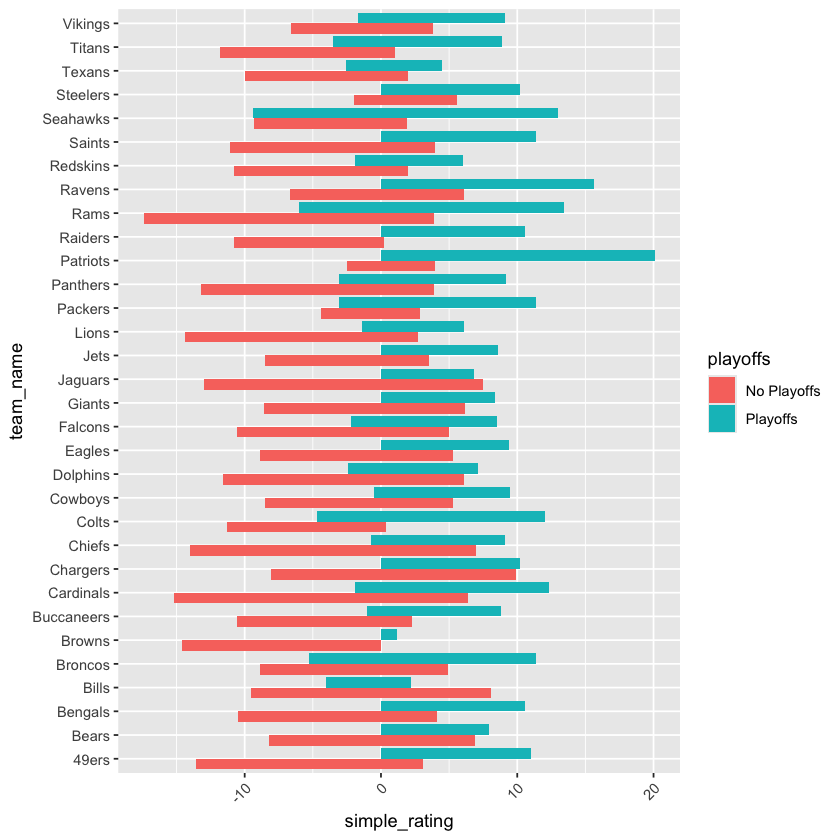

In [8]:
attendance_joined %>%
  
filter(!is.na(weekly_attendance)) %>%  
  ggplot(aes(team_name , simple_rating , fill  = playoffs )  ) + 
  
  geom_bar(stat = "identity" , position = "dodge") +
  
  theme(axis.text.x  = element_text(angle = 45 , hjust = 1)) +
  coord_flip()

In [9]:
##### This reveals a co-relation between rating of teams with there outcome of qualifying for playoffs.
##### The years where they didnt qualify for playoffs were the years where there rating fell.

Warning message:
“Removed 638 rows containing missing values or values outside the scale range
(`geom_bar()`).”


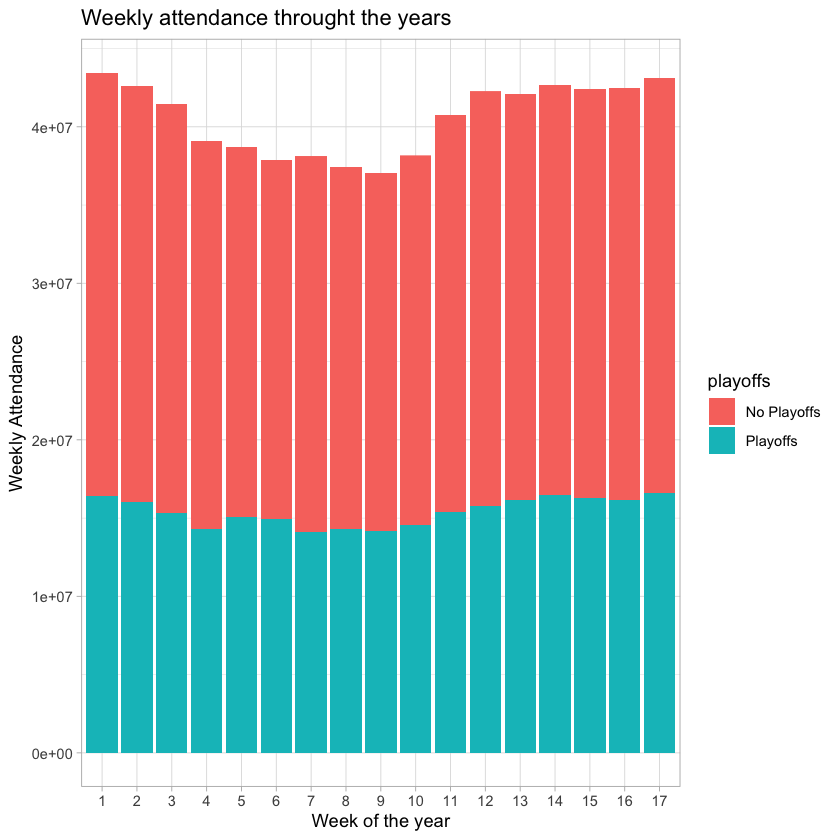

In [10]:
attendance_joined %>% 
  
  ggplot(aes(factor(week) , weekly_attendance , fill = playoffs)) +
  
  geom_bar(stat = "identity" ) +
  
  labs(title = "Weekly attendance throught the years" , 
       
       x = "Week of the year" , 
       
       y = "Weekly Attendance") +
  
  theme_light()

In [11]:
##### The start of the season is usually associated with higher weekly attendance followed by a small dip mid-season and again an increase towards the end of the season.


In [12]:
# Creating the dataframe used for model building.

attendace_df = attendance_joined %>%
  
  filter(!is.na(weekly_attendance)) %>%
  
  select(team_name , weekly_attendance , week , year , margin_of_victory , strength_of_schedule , playoffs)


head(attendace_df)

team_name,weekly_attendance,week,year,margin_of_victory,strength_of_schedule,playoffs
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Cardinals,77434,1,2000,-14.6,-0.7,No Playoffs
Cardinals,66009,2,2000,-14.6,-0.7,No Playoffs
Cardinals,71801,4,2000,-14.6,-0.7,No Playoffs
Cardinals,66985,5,2000,-14.6,-0.7,No Playoffs
Cardinals,44296,6,2000,-14.6,-0.7,No Playoffs
Cardinals,38293,7,2000,-14.6,-0.7,No Playoffs


In [13]:

# Installing tidymodels package to split data into train and test.

#install.packages("tidymodels")

library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5      ✔ rsample      1.2.0 
✔ dials        1.2.1      ✔ tune         1.1.2 
✔ infer        1.0.6      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.0.1 
✔ parsnip      1.2.0      ✔ yardstick    1.3.0 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [17]:

# Creating an object named attendance_split that stores the split data. Using argument strata = playoffs so that the data is evenly split keeping playoffs in mind.

attendance_split =  attendace_df  %>%
  
  initial_split( strata = "playoffs")


# Calling the training and testing data and storing it into specific objects.

train_data = training(attendance_split)

test_data = testing(attendance_split)


In [24]:
# Building a linear regression model to find out which variables have the maximum impact to my weekly_attendance variable.

linear_model =  linear_reg() %>%
  
  fit(data = train_data , weekly_attendance ~.)



tidy(linear_model) %>% arrange(p.value)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
team_nameCardinals,-6344.55325,759.33835,-8.3553705,7.681234e-17
team_nameChargers,-6179.62745,758.03061,-8.1522136,4.144862e-16
team_nameRedskins,5880.27354,757.73463,7.7603336,9.572487e-15
team_nameCowboys,5830.62019,754.43757,7.7284330,1.228003e-14
team_nameRaiders,-5936.83785,769.36724,-7.7165202,1.347369e-14
team_nameGiants,5836.16469,764.79743,7.6309941,2.612053e-14
team_nameBengals,-4356.23850,762.77739,-5.7110221,1.165228e-08
team_nameJets,4262.96138,757.48112,5.6278120,1.889867e-08
team_nameJaguars,-4041.82403,757.60002,-5.3350368,9.827256e-08


In [ ]:
#### The team names, margin of victory, year, week have an impact on the weekly attendance since there p values are quite low which
#### provides a statistical view of the strong impact these variables can have on weekly attendance.

In [25]:
#install.packages("randomForest")

library(randomForest)

# Building a random forest model for regression.

rf_spec <- rand_forest(mode = "regression") %>%
  set_engine("ranger")


rf_model =  rf_spec %>%
                
                    fit(weekly_attendance ~. , train_data)
rf_model

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, num.threads = 1,      verbose = FALSE, seed = sample.int(10^5, 1)) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      7656 
Number of independent variables:  6 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       74142368 
R squared (OOB):                  0.08035657 

In [26]:
#### Testing models on test data.

# CREating a dataframe named results_train which stores the results of the 2 models on training dataset.
  
results_train = rbind(predict(linear_model , train_data) %>%
  
  mutate(real_value = train_data$weekly_attendance , method = 'lm')  , 
    
    predict(rf_model , train_data) %>%
      
      mutate(real_value = train_data$weekly_attendance , method = "rf")
  )

head(results_train)


# CREating a dataframe named results_test which stores the results of the 2 models on test dataset.

results_test = rbind(predict(linear_model , test_data) %>%
  
  mutate(real_value = test_data$weekly_attendance , method = 'lm')  , 
  
  
    
    predict(rf_model , test_data) %>%
      
      mutate(real_value = test_data$weekly_attendance , method = "rf")
  )

head(results_test)

.pred,real_value,method
<dbl>,<dbl>,<chr>
60306.83,77434,lm
60237.53,66009,lm
60098.95,71801,lm
59960.36,44296,lm
59821.77,62981,lm
59752.48,35286,lm


.pred,real_value,method
<dbl>,<dbl>,<chr>
60029.65,66985,lm
59891.07,38293,lm
59683.19,52244,lm
59475.31,42094,lm
59198.14,65711,lm
66625.69,46178,lm


In [27]:
#Checking the performance of our models on training and testing data
results_train %>%
  
  group_by(method) %>%

rmse(truth = real_value , estimate = .pred)


results_test %>%
  
  group_by(method) %>%
  
  rmse(truth = real_value , estimate = .pred)

method,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
lm,rmse,standard,8286.563
rf,rmse,standard,6017.508


method,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
lm,rmse,standard,8418.360
rf,rmse,standard,8682.423


In [28]:
##### When I checked how well my models performed on the data they were trained on, the random forest model seemed much better than the linear model. 
##### The error was much lower. However, when I tested these models on new data they haven't seen before, the situation changed. 
##### My linear model's performance stayed similar between the training and testing, 
##### which is good news because it suggests the model isn't overly specialized for the training data. 
##### But for the random forest model, the error increased quite a bit on the testing data compared to the training data. 
##### This tells me that the random forest model is too focused on the training data and doesn't generalize well to new, unseen data. 
##### In other words, it has overfit to the training data.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


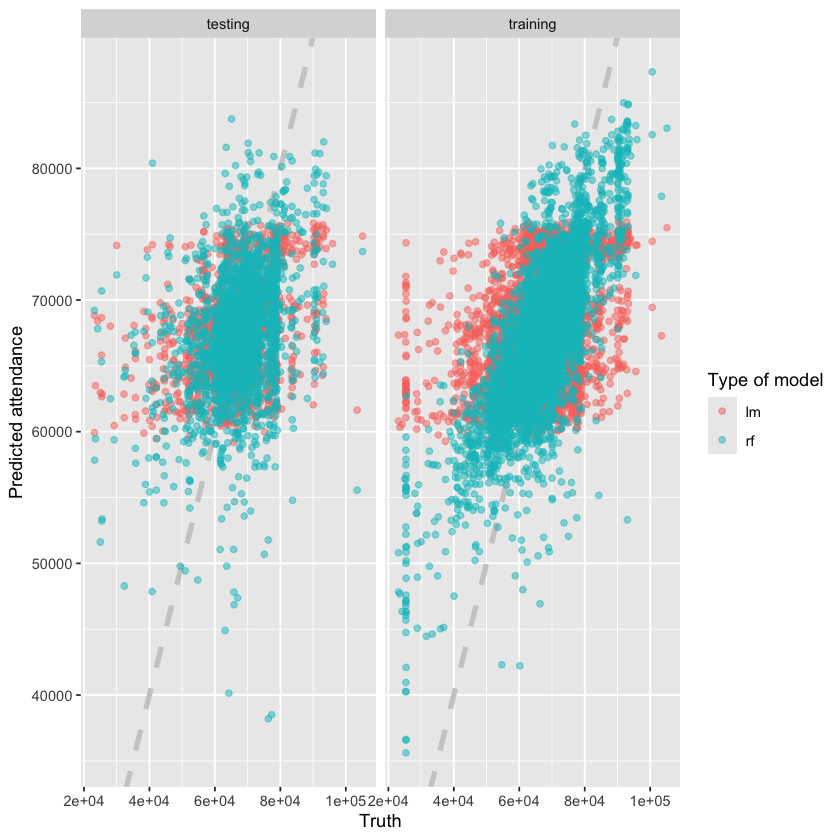

In [29]:
#### Visualizing the above results.

results_test %>%
  
  mutate(train = "testing") %>%
  
  bind_rows(results_train %>%
              
    mutate(train = "training")) %>%
  
  ggplot(aes(real_value, .pred, color = method)) +
  
  geom_abline(lty = 2, color = "gray80", size = 1.5) +
  
  geom_point(alpha = 0.5) +
  
  facet_wrap(~train) +
  
  labs(
    x = "Truth",
    y = "Predicted attendance",
    color = "Type of model"
  )

In [30]:

##### Both models appear to have a similar level of accuracy for higher attendance values, 
##### as there are several points that fall close to the dotted line representing perfect predictions.


##### For lower attendance values, both models tend to over-predict the actual values, as most of the points fall above the dotted line.


##### The rf model appears to have slightly more variability in its predictions, 
##### as there are more points that fall further away from the dotted line compared to the Im model.


##### This also shows that rf_model has performed well on training data as the points are closer to the prediction line,
##### however the opposite is witnessed for its perormance on testing data.

In [31]:
#Specs for the random forest model
rf_spec <- rand_forest(mode = "regression", engine = "ranger") %>%
  set_mode("regression") %>%
  set_engine("ranger")

In [32]:
#### Retraining the random forest model to achieve better results.

# The function vfold_cv() creates folds for cross-validation

nfl_folds <- vfold_cv(train_data, strata = playoffs)

# The function fit_resamples() fits models to resamples such as these (to measure performance), and then we can collect_metrics() from the result.


rf_res <- fit_resamples(
  rf_spec , 
  
 weekly_attendance ~ . , 
  
  nfl_folds,
  
  control = control_resamples(save_pred = TRUE)
  
)

In [35]:
#Getting a summary of performance metrics of this model

rf_res %>%
  collect_metrics()




.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
rmse,standard,8615.8363994,10,79.031203451,Preprocessor1_Model1
rsq,standard,0.1125625,10,0.007342927,Preprocessor1_Model1


In [36]:
##### This brings the rmse score close to the the linear model score we obtained in the training data.


In [37]:
#Creating a workflow for my random forest model
svm_wf <- workflow() %>%
  
  add_model(rf_spec) %>%
  
  add_formula(weekly_attendance ~ .)

In [39]:
#Fitting the new model on training data
new_model_train =  svm_wf %>%
  
  fit(train_data)

In [40]:
#Creating an object which stores the predictions as well as original values
new_results_test = bind_rows( predict(new_model_train , test_data) %>%
  
  mutate(real = test_data$weekly_attendance , method = "rf") , 


predict(linear_model , test_data) %>%
            
            mutate(real = test_data$weekly_attendance , method = "lm"))
  
  

head(new_results_test)

.pred,real,method
<dbl>,<dbl>,<chr>
59598.24,66985,rf
54608.60,38293,rf
55956.64,52244,rf
55581.00,42094,rf
51514.82,65711,rf
62149.81,46178,rf


In [43]:

results_test %>%
  
  group_by(method) %>%

rmse(truth = real_value , estimate = .pred)



new_results_test %>%
  
  group_by(method) %>%
  
  rmse(truth = real , estimate = .pred)


method,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
lm,rmse,standard,8418.360
rf,rmse,standard,8682.423


method,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
lm,rmse,standard,8418.360
rf,rmse,standard,8671.215


In [44]:
#### Now the random forest estimate has come closer to train data.
